this dataset utilizes data from 2014 Major League Baseball seasons 
in order to develop an algorithm that predicts the
number of wins for a given team in the 2015 season 

DESCRIPTION OF COLUMNS--
W: Wins
R:Runs:- a run is gain when the player complete one circle

AB:At Bats:-at bat/time at bat is a batter's turn batting against a pitcher.

H:Hits:-It's credited to a batter when the batter safely reaches first base after hitting the ball into fair territory, without the benefit of an error.

2B:Doubles:-hits on which the batter reaches second base safely without the contribution of a fielding error

3B:Triples:-Double: hits on which the batter reaches third base safely without the contribution of a fielding error

HR:Homeruns:-when the batter reaches the home plate safely by circling all the bases  one play without  without the contribution of a fielding error or if the batter hit the ball over the outfield fence between the foul poles.

BB:Walks:- a free advance to first base

SO:Strikeouts:- It usually means the batter is out

SB:Stolen Bases:--In baseball, a stolen base occurs when a runner advances to a base to which he is not entitled 

RA:Runs Allowed:-- the total runs against a pitcher

ER:Earned Runs:-- run scored by the offensive team

ERA:Earned Run Average:--average of earned runs given up by a pitcher per nine innings pitched(i.e. in total the game)

CG: complete game: the act of a pitcher pitching an entire game without the benefit of a relief pitcher

SHO:Shutouts--the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run

SV:Saves--where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead,

E:Errors--fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases




 162 games and 30 teams in 2014 Major League Baseball season
 8month long season

In [1]:
#importing importing libraries required for EDA 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore,boxcox
import warnings 
warnings.filterwarnings('ignore')

In [2]:
bb=pd.read_csv('BASEBALL.csv')
bb

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
bb.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [4]:
bb.shape

(30, 17)

In [5]:
#rearranging the columns taking the target to the last
bb=bb[['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E','W']]
bb

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88,93
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,87
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,81
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,80
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,78


In [6]:
type(bb)

pandas.core.frame.DataFrame

In [7]:
bb.dtypes

R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
W        int64
dtype: object

In [8]:
bb.head(10)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88,93
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,87
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,81
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,80
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,78


In [9]:
bb.tail(10)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
20,683,5527,1351,295,17,177,488,1290,51,613,557,3.43,1,14,50,88,90
21,703,5428,1363,265,13,177,539,1344,57,635,577,3.62,4,13,41,90,83
22,613,5463,1420,236,40,120,375,1150,112,678,638,4.02,0,12,35,77,71
23,573,5420,1361,251,18,100,471,1107,69,760,698,4.41,3,10,44,90,67
24,626,5529,1374,272,37,130,387,1274,88,809,749,4.69,1,7,35,117,63
25,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75,92
26,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78,84
27,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86,79
28,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92,74
29,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95,68


In [10]:
bb.columns

Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'E', 'W'],
      dtype='object')

In [11]:
#renaming columns for batter understanding
bb.rename(columns={'R':'runs','AB':'AtBat','H':'hits','2B':'dble','3B':'tple','HR':'HomRns', 
                       'BB':'walk','SO':'strikeout','SB':'stolen','RA':'RnsAllowed', 'ER':'EarnedRns', 
                       'ERA':'EarnedRunAvg','CG':'CmplGame','SHO':'shoutout','SV':'saves','E':'error','W':'wins'},inplace=True)
bb

,runs,AtBat,hits,dble,tple,HomRns,walk,strikeout,stolen,RnsAllowed,EarnedRns,EarnedRunAvg,CmplGame,shoutout,saves,error,wins
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88,93
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,87
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,81
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,80
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,78


In [12]:
#checking for duplicated values
dups=bb.duplicated(keep='first').sum()
dups

0

no trace of duplicated values

In [13]:
bb.max()

runs             891.00
AtBat           5649.00
hits            1515.00
dble             308.00
tple              49.00
HomRns           232.00
walk             570.00
strikeout       1518.00
stolen           134.00
RnsAllowed       844.00
EarnedRns        799.00
EarnedRunAvg       5.04
CmplGame          11.00
shoutout          21.00
saves             62.00
error            126.00
wins             100.00
dtype: float64

In [14]:
bb.min()

runs             573.00
AtBat           5385.00
hits            1324.00
dble             236.00
tple              13.00
HomRns           100.00
walk             375.00
strikeout        973.00
stolen            44.00
RnsAllowed       525.00
EarnedRns        478.00
EarnedRunAvg       2.94
CmplGame           0.00
shoutout           4.00
saves             28.00
error             75.00
wins              63.00
dtype: float64

In [15]:
bb.mean()

runs             688.233333
AtBat           5516.266667
hits            1403.533333
dble             274.733333
tple              31.300000
HomRns           163.633333
walk             469.100000
strikeout       1248.200000
stolen            83.500000
RnsAllowed       688.233333
EarnedRns        635.833333
EarnedRunAvg       3.956333
CmplGame           3.466667
shoutout          11.300000
saves             43.066667
error             94.333333
wins              80.966667
dtype: float64

In [16]:
bb.median()

runs             689.000
AtBat           5510.000
hits            1382.500
dble             275.500
tple              31.000
HomRns           158.500
walk             473.000
strikeout       1261.500
stolen            83.500
RnsAllowed       695.500
EarnedRns        644.500
EarnedRunAvg       4.025
CmplGame           3.000
shoutout          12.000
saves             42.000
error             91.000
wins              81.000
dtype: float64

In [17]:
bb.std()

runs             58.761754
AtBat            70.467372
hits             57.140923
dble             18.095405
tple             10.452355
HomRns           31.823309
walk             57.053725
strikeout       103.759470
stolen           22.815225
RnsAllowed       72.108005
EarnedRns        70.140786
EarnedRunAvg      0.454089
CmplGame          2.763473
shoutout          4.120177
saves             7.869335
error            13.958889
wins             10.453455
dtype: float64

In [18]:
#checking for null values
bb.isnull().sum()

runs            0
AtBat           0
hits            0
dble            0
tple            0
HomRns          0
walk            0
strikeout       0
stolen          0
RnsAllowed      0
EarnedRns       0
EarnedRunAvg    0
CmplGame        0
shoutout        0
saves           0
error           0
wins            0
dtype: int64

no trace of any null values

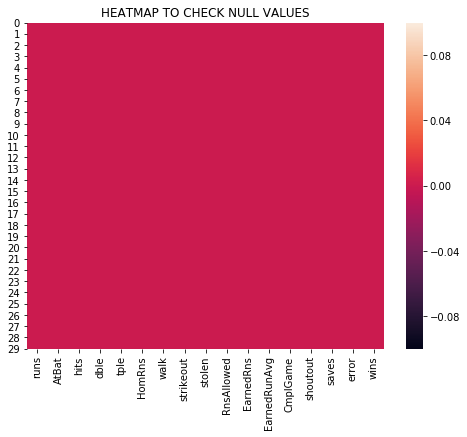

In [19]:
#heatmap to visualize the null values
plt.figure(figsize=(8,6))
sns.heatmap(bb.isnull())
plt.title('HEATMAP TO CHECK NULL VALUES')
plt.show()

In [20]:
#group by
bb.groupby(['wins']).mean()

,runs,AtBat,hits,dble,tple,HomRns,walk,strikeout,stolen,RnsAllowed,EarnedRns,EarnedRunAvg,CmplGame,shoutout,saves,error
wins,,,,,,,,,,,,,,,,
63,626.000000,5529.000000,1374.000000,272.0,37.0,130.0,387.0,1274.000000,88.000000,809.0,749.0,4.690000,1.000000,7.000000,35.000000,117.000000
64,640.000000,5571.000000,1382.000000,257.0,27.0,167.0,496.0,1255.000000,134.000000,754.0,700.0,4.330000,2.000000,8.000000,35.000000,90.000000
67,573.000000,5420.000000,1361.000000,251.0,18.0,100.0,471.0,1107.000000,69.000000,760.0,698.0,4.410000,3.000000,10.000000,44.000000,90.000000
68,695.333333,5550.666667,1420.666667,275.0,43.0,159.0,425.0,1233.666667,86.333333,770.0,715.0,4.486667,3.333333,8.666667,34.666667,112.333333
71,613.000000,5463.000000,1420.000000,236.0,40.0,120.0,375.0,1150.000000,112.000000,678.0,638.0,4.020000,0.000000,12.000000,35.000000,77.000000
74,669.500000,5531.000000,1419.500000,274.5,42.5,149.5,440.5,1293.000000,82.500000,767.0,700.5,4.365000,4.000000,9.000000,38.000000,89.000000
76,639.000000,5538.500000,1380.000000,261.0,24.5,167.0,441.0,1283.500000,68.500000,713.5,660.0,4.070000,6.500000,10.500000,41.000000,97.500000
78,748.000000,5640.000000,1495.000000,294.0,33.0,161.0,478.0,1148.000000,71.000000,753.0,694.0,4.310000,3.000000,10.000000,40.000000,97.000000
79,720.000000,5649.000000,1494.000000,289.0,48.0,154.0,490.0,1312.000000,132.000000,713.0,659.0,4.040000,1.000000,12.000000,44.000000,86.000000


In [21]:
#group by
bb.groupby(['wins','runs']).mean()

AtBat  hits  dble  tple  HomRns  walk  strikeout  stolen  \
wins runs                                                             
63   626    5529  1374   272    37     130   387       1274      88   
64   640    5571  1382   257    27     167   496       1255     134   
67   573    5420  1361   251    18     100   471       1107      69   
68   655    5480  1378   274    34     145   412       1299      84   
     694    5600  1405   277    46     146   475       1119      78   
     737    5572  1479   274    49     186   388       1283      97   
71   613    5463  1420   236    40     120   375       1150     112   
74   650    5457  1324   260    36     148   426       1327      82   
     689    5605  1515   289    49     151   455       1259      83   
76   622    5533  1381   260    27     136   404       1231      68   
     656    5544  1379   262    22     198   478       1336      69   
78   748    5640  1495   294    33     161   478       1148      71   
79   720    5649  1494   289    48     154   490       1312     132   
80   644    5485  1383   278    32     167   436       1310      87   
81   669    5439  1395   303    29     141   533       1157      86   
     713    5485  1370   246    20     217   418       1331      44   
83   696    5467  1349   277    44     156   439       1264      70   
     703    5428  1363   265    13     177   539       1344      57   
84   696    5565  1486   288    39     136   457       1159      93   
85   661    5417  1331   243    21     176   435       1150      52   
86   729    5459  1363   278    26     230   486       1392     121   
87   764    5567  1397   272    19     212   554       1227      63   
88   751    5511  1419   279    32     172   503       1233     101   
90   683    5527  1351   295    17     177   488       1290      51   
92   667    5385  1346   263    26     187   563       1258      59   
93   891    5509  1480   308    17     232   570       1151      88   
95   724    5575  1497   300    42     139   383        973     104   
97   689    5491  1341   272    30     171   567       1518      95   
98   697    5631  1462   292    27     140   461       1322      98   
100  647    5484  1386   288    39     137   506       1267      69   

           RnsAllowed  EarnedRns  EarnedRunAvg  CmplGame  shoutout  saves  \
wins runs                                                                   
63   626          809        749          4.69         1         7     35   
64   640          754        700          4.33         2         8     35   
67   573          760        698          4.41         3        10     44   
68   655          737        682          4.28         1         7     40   
     694          729        664          4.14         5        15     28   
     737          844        799          5.04         4         4     36   
71   613          678        638          4.02         0        12     35   
74   650          731        655          4.09         1         6     41   
     689          803        746          4.64         7        12     35   
76   622          701        643          3.98         7         9     37   
     656          726        677          4.16         6        12     45   
78   748          753        694          4.31         3        10     40   
79   720          713        659          4.04         1        12     44   
80   644          642        604          3.74         1        12     60   
81   669          640        584          3.67        11        10     38   
     713          693        646          4.05         0        10     43   
83   696          700        653          4.07         2        12     45   
     703          635        577          3.62         4        13     41   
84   696          627        597          3.72         7        18     41   
85   661          675        630          3.94         2        12     46   
86   729          618        572          3.

In [22]:
val=bb.columns.values
val

array(['runs', 'AtBat', 'hits', 'dble', 'tple', 'HomRns', 'walk',
       'strikeout', 'stolen', 'RnsAllowed', 'EarnedRns', 'EarnedRunAvg',
       'CmplGame', 'shoutout', 'saves', 'error', 'wins'], dtype=object)

In [23]:
bb.describe()

,runs,AtBat,hits,dble,tple,HomRns,walk,strikeout,stolen,RnsAllowed,EarnedRns,EarnedRunAvg,CmplGame,shoutout,saves,error,wins
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333,80.966667
std,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889,10.453455
min,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000,63.000000
25%,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000,74.000000
50%,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000,81.000000
75%,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000,87.750000
max,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000,100.000000


Implementing graphical methods for more exploration of dataset

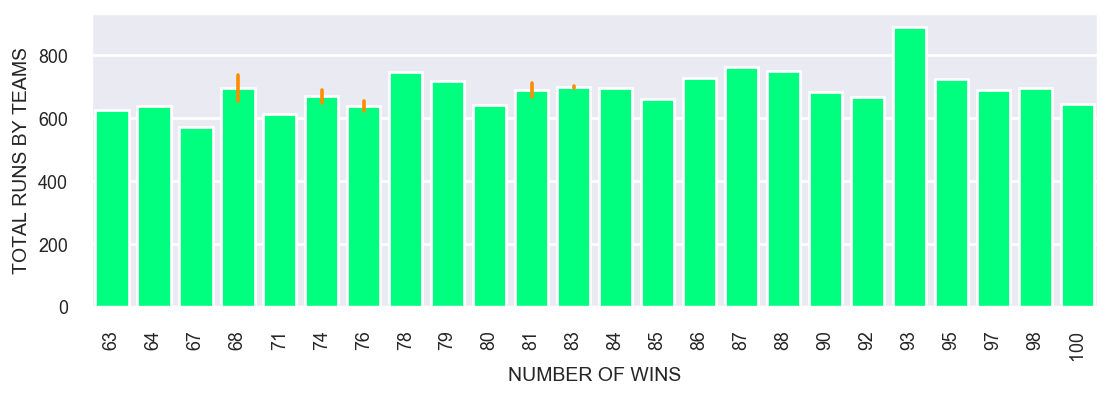

In [24]:
sns.set(style='darkgrid')
plt.figure(dpi=130,figsize=(10,3))
sns.set_context('talk',font_scale=0.6)
pl1=sns.barplot(x='wins',y='runs',data=bb,ci=95,orient='v',color='springgreen',saturation=25,errcolor='darkorange',errwidth=2)
pl1.set_xticklabels(pl1.get_xticklabels(),rotation=90)
plt.xlabel('NUMBER OF WINS')
plt.ylabel('TOTAL RUNS BY TEAMS')
plt.show()

The above plot is showing that the team with 93 wins have scored the highest runs i.e. more than 800 and team with  highest numbers of wins have scored in between 600-700

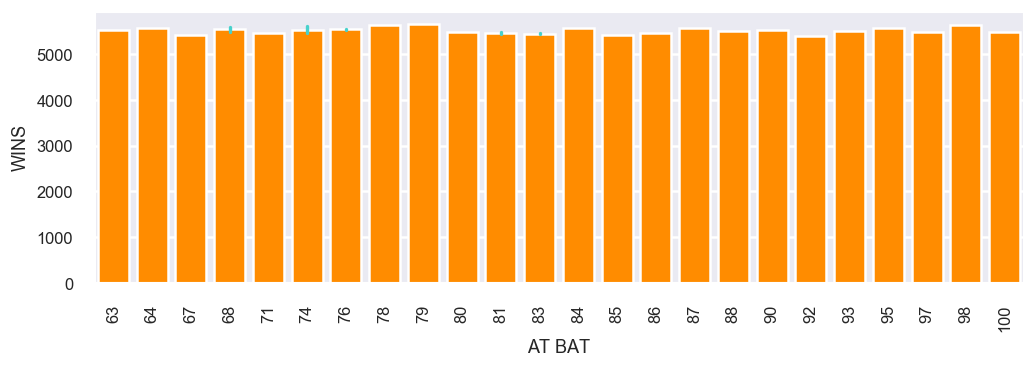

In [25]:
sns.set(style='darkgrid')
plt.figure(dpi=120,figsize=(10,3))
sns.set_context('talk',font_scale=0.6)
pl1=sns.barplot(x='wins',y='AtBat',data=bb,ci=95,orient='v',color='darkorange',saturation=25,errcolor='mediumturquoise',errwidth=2)
pl1.set_xticklabels(pl1.get_xticklabels(),rotation=90)
plt.xlabel('AT BAT')
plt.ylabel('WINS')
plt.show()

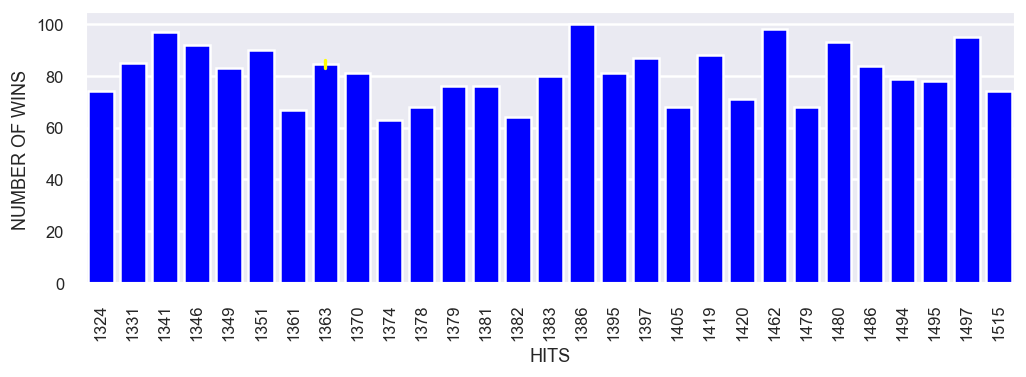

In [26]:
sns.set(style='darkgrid')
plt.figure(dpi=120,figsize=(10,3))
sns.set_context('talk',font_scale=0.6)
pl2=sns.barplot(x='hits',y='wins',data=bb,ci=95,orient='v',color='blue',saturation=25,errcolor='yellow',errwidth=2)
pl2.set_xticklabels(pl2.get_xticklabels(),rotation=90)
plt.xlabel('HITS')
plt.ylabel('NUMBER OF WINS ')
plt.show()

a fair hits of 1383 and 1462 contributes to a high number of wins

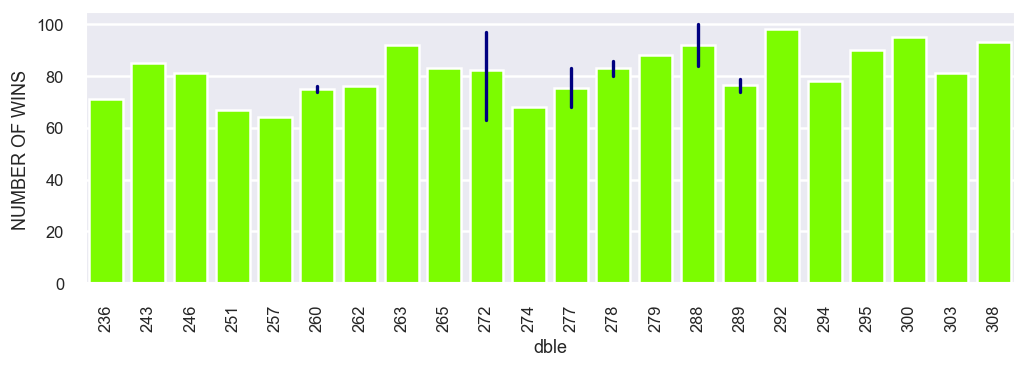

In [27]:
sns.set(style='darkgrid')
plt.figure(dpi=120,figsize=(10,3))
sns.set_context('talk',font_scale=0.6)
pl3=sns.barplot(x='dble',y='wins',data=bb,ci=95,orient='v',color='lawngreen',saturation=20,errcolor='navy',errwidth=2)
pl3.set_xticklabels(pl3.get_xticklabels(),rotation=90)
plt.xlabel('dble')
plt.ylabel('NUMBER OF WINS ')
plt.show()

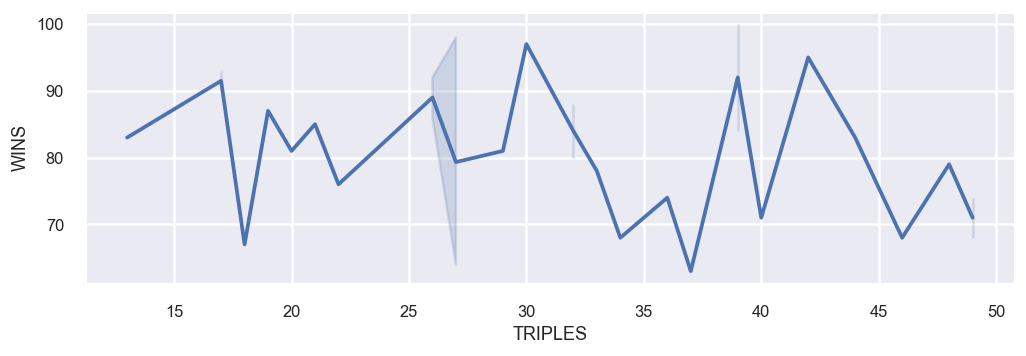

In [28]:
sns.set(style='darkgrid')
plt.figure(dpi=120,figsize=(10,3))
sns.set_context('talk',font_scale=0.6)
sns.lineplot(x='tple',y='wins',data=bb,dashes=True,markers='1',estimator='mean',ci=95,err_style='band',palette='viridis')
plt.xlabel('TRIPLES')
plt.ylabel('WINS')
plt.show()

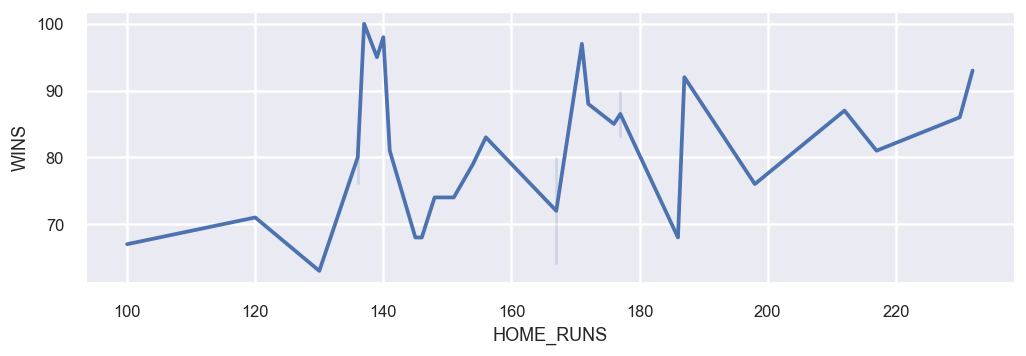

In [29]:
sns.set(style='darkgrid')
plt.figure(dpi=120,figsize=(10,3))
sns.set_context('talk',font_scale=0.6)
sns.lineplot(x='HomRns',y='wins',data=bb,dashes=True,estimator='mean',ci=95,err_style='band')
plt.xlabel('HOME_RUNS')
plt.ylabel('WINS')
plt.show()

THE RELATION BETWEEN NUMBER OF HOMERUNS AND WINS ARE NOT LINEAR. HIGH NUMBERS OF HOMERUN DOESN'T GIVE ALWAYS A WIN

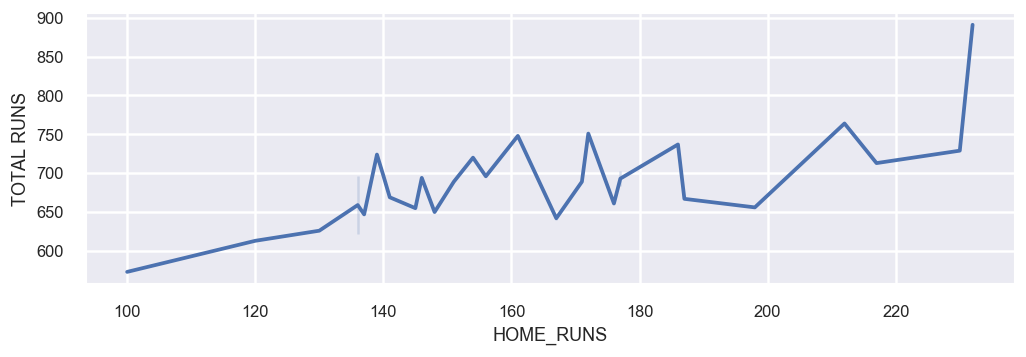

In [30]:
sns.set(style='darkgrid')
plt.figure(dpi=120,figsize=(10,3))
sns.set_context('talk',font_scale=0.6)
sns.lineplot(x='HomRns',y='runs',data=bb,dashes=True,estimator='mean',ci=95,err_style='band')
plt.xlabel('HOME_RUNS')
plt.ylabel('TOTAL RUNS')
plt.show()

A HIGHER NUMBER OF HOMERUN RESULTS IN A HIGH SCORE

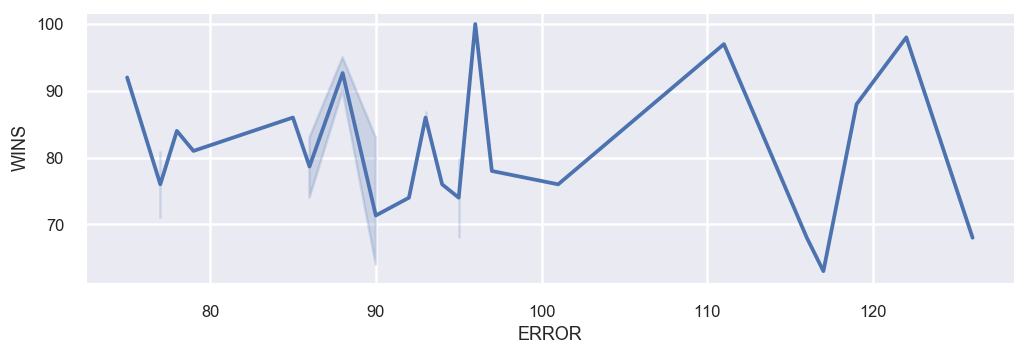

In [31]:
sns.set(style='darkgrid')
plt.figure(dpi=120,figsize=(10,3))
sns.set_context('talk',font_scale=0.6)
sns.lineplot(x='error',y='wins',data=bb,dashes=True,estimator='mean',ci=95,err_style='band')
plt.xlabel('ERROR')
plt.ylabel('WINS')
plt.show()

HIGH ERROR RESULTS IN A LOSS.TEAMS WITH ERRORS MORE THAN 120 HAVE A WINNING NUMBER OF LESS THAN 70

Text(0.5, 1.0, 'HISTOGRAM TO SEE THE FREQUENCY OF RUN SCORED')

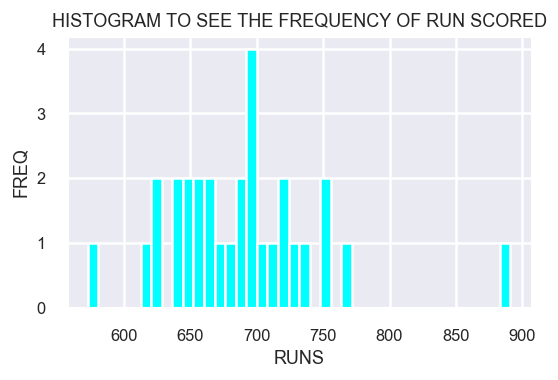

In [32]:
sns.set(style='darkgrid')
plt.figure(dpi=120,figsize=(5,3))
sns.set_context('talk',font_scale=0.6)
bb['runs'].plot.hist(bins=40,color='cyan')
plt.xlabel('RUNS')
plt.ylabel('FREQ')
plt.title('HISTOGRAM TO SEE THE FREQUENCY OF RUN SCORED')

Text(0.5, 1.0, 'HISTOGRAM TO SEE THE FREQUENCY OF HITS')

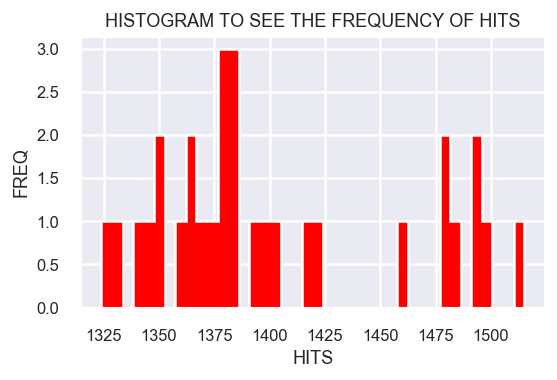

In [33]:
sns.set(style='darkgrid')
plt.figure(dpi=120,figsize=(5,3))
sns.set_context('talk',font_scale=0.6)
bb['hits'].plot.hist(bins=40,histtype='stepfilled',color='red')
plt.xlabel('HITS')
plt.ylabel('FREQ')
plt.title('HISTOGRAM TO SEE THE FREQUENCY OF HITS')

In [34]:
cl=bb.columns.values
cl

array(['runs', 'AtBat', 'hits', 'dble', 'tple', 'HomRns', 'walk',
       'strikeout', 'stolen', 'RnsAllowed', 'EarnedRns', 'EarnedRunAvg',
       'CmplGame', 'shoutout', 'saves', 'error', 'wins'], dtype=object)

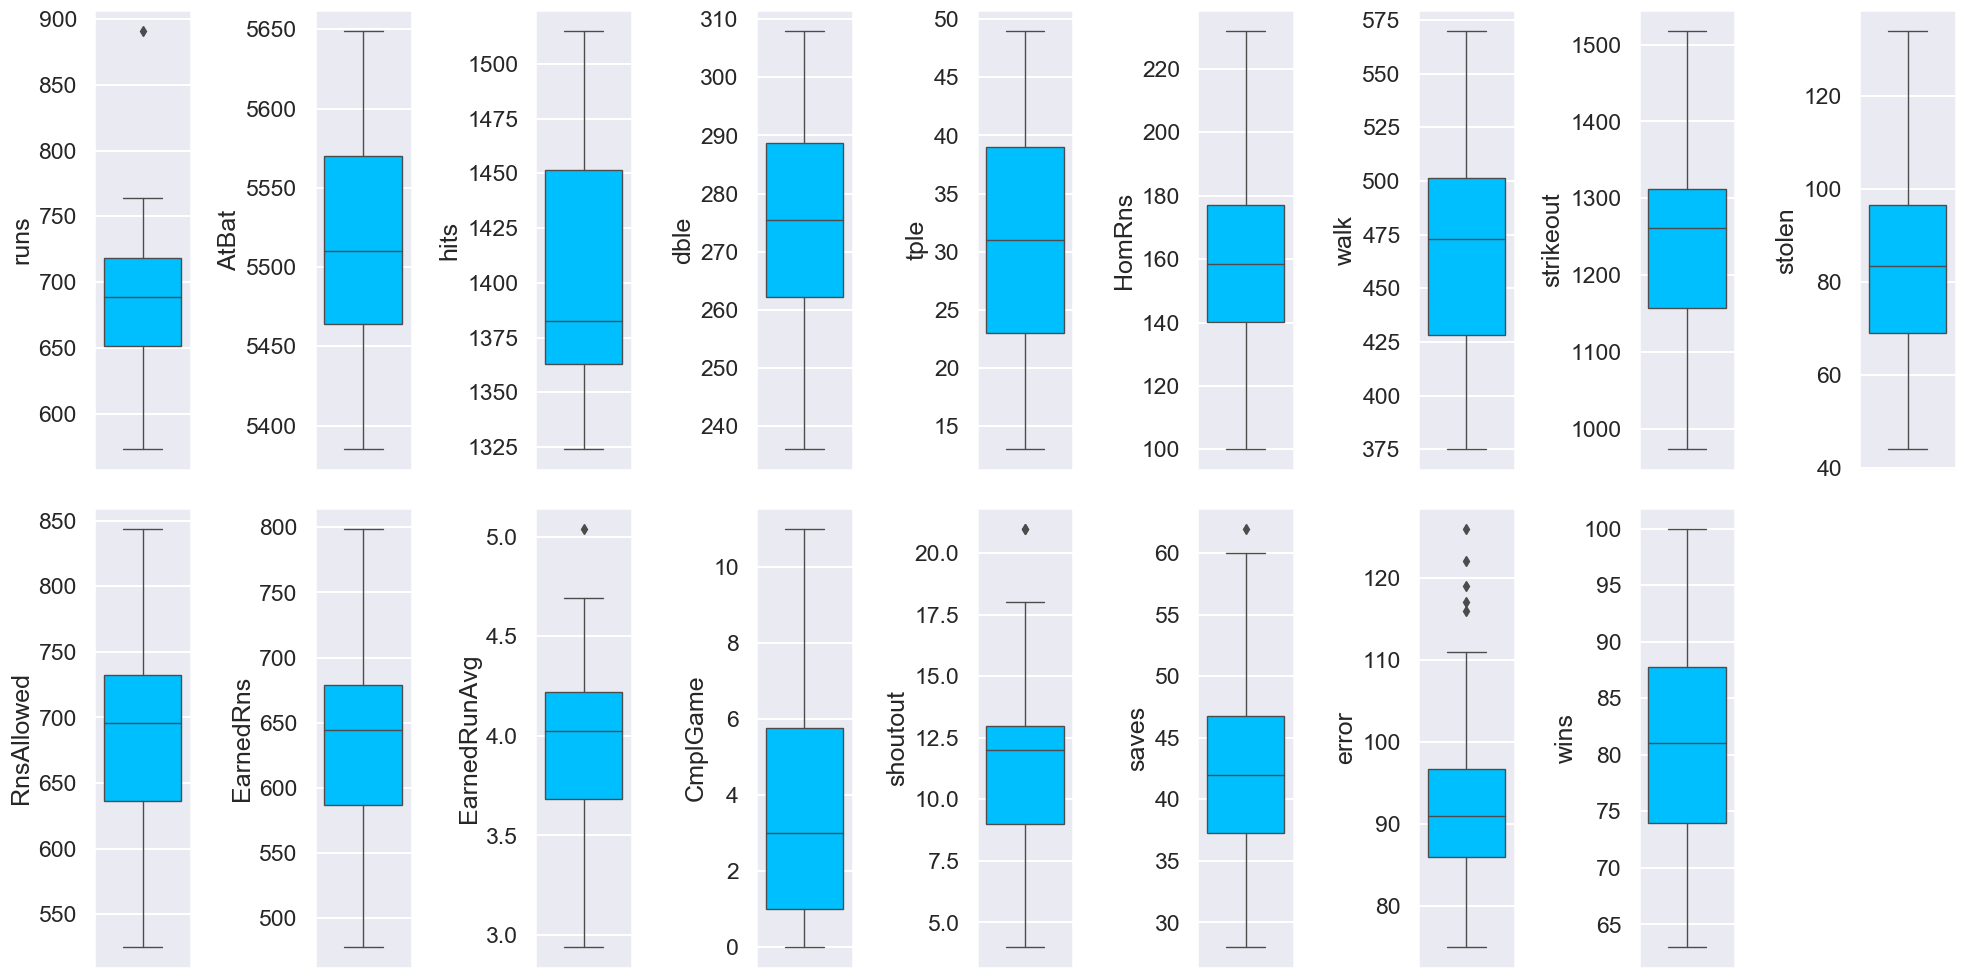

In [35]:
sns.set(style='darkgrid')
plt.figure(dpi=100,figsize=(20,40))
sns.set_context('talk',font_scale=1)
for i in range (0,17):
    plt.subplot(8,9,i+1)
    sns.boxplot(bb[cl[i]],color='deepskyblue',linewidth=1,saturation=18,orient='v')
plt.tight_layout()

In [36]:
#checking for outliers
z=np.abs(zscore(bb))
z

array([[6.19077968e-01, 8.47731264e-01, 1.66368512e+00, 1.42017307e+00,
        1.04119304e+00, 7.87298598e-01, 1.53490242e+00, 2.69762957e+00,
        9.13883291e-01, 6.66233927e-01, 5.05110079e-01, 5.06955186e-01,
        5.39806195e-01, 8.14628593e-01, 1.67160651e+00, 4.61469635e-01,
        1.36540860e+00],
       [1.34431656e-01, 7.11093535e-01, 9.70680764e-01, 1.27403389e-01,
        1.23580856e+00, 2.43966683e-01, 5.36591904e-01, 1.54878442e-01,
        6.01825582e-01, 1.65970766e-01, 2.48929848e-01, 2.54597523e-01,
        5.39806195e-01, 1.72800005e-01, 2.49879323e-01, 6.07196888e-01,
        1.97838300e-01],
       [3.32905860e-01, 1.11523330e+00, 1.51891367e-01, 1.58879521e+00,
        2.23807850e-01, 7.23377196e-01, 1.13914361e+00, 8.93981893e-01,
        1.11449182e-01, 6.80339091e-01, 7.51623132e-01, 6.41346840e-01,
        2.77264091e+00, 3.20914294e-01, 6.54856158e-01, 1.11724227e+00,
        3.24325082e-03],
       [1.14641931e+00, 2.41521620e-01, 4.01088140e-01, 8.281

In [37]:
print(np.where(z>3))


(array([5], dtype=int64), array([0], dtype=int64))


In [38]:
z[5][0]


3.5096470447193067

In [39]:
baseball=bb[(z<3).all(axis=1)]

In [40]:
print('The shape before outlier removal:\t',bb.shape,'\nThe shape after outlier removal:\t',baseball.shape,'\nso a total of',len(bb)-len(baseball),'row has been removed')

The shape before outlier removal:	 (30, 17) 
The shape after outlier removal:	 (29, 17) 
so a total of 1 row has been removed


In [41]:
baseball

,runs,AtBat,hits,dble,tple,HomRns,walk,strikeout,stolen,RnsAllowed,EarnedRns,EarnedRunAvg,CmplGame,shoutout,saves,error,wins
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,87
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,81
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,80
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,78
10,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119,88


In [42]:
cl=baseball.columns.values
cl

array(['runs', 'AtBat', 'hits', 'dble', 'tple', 'HomRns', 'walk',
       'strikeout', 'stolen', 'RnsAllowed', 'EarnedRns', 'EarnedRunAvg',
       'CmplGame', 'shoutout', 'saves', 'error', 'wins'], dtype=object)

checking for skewness 

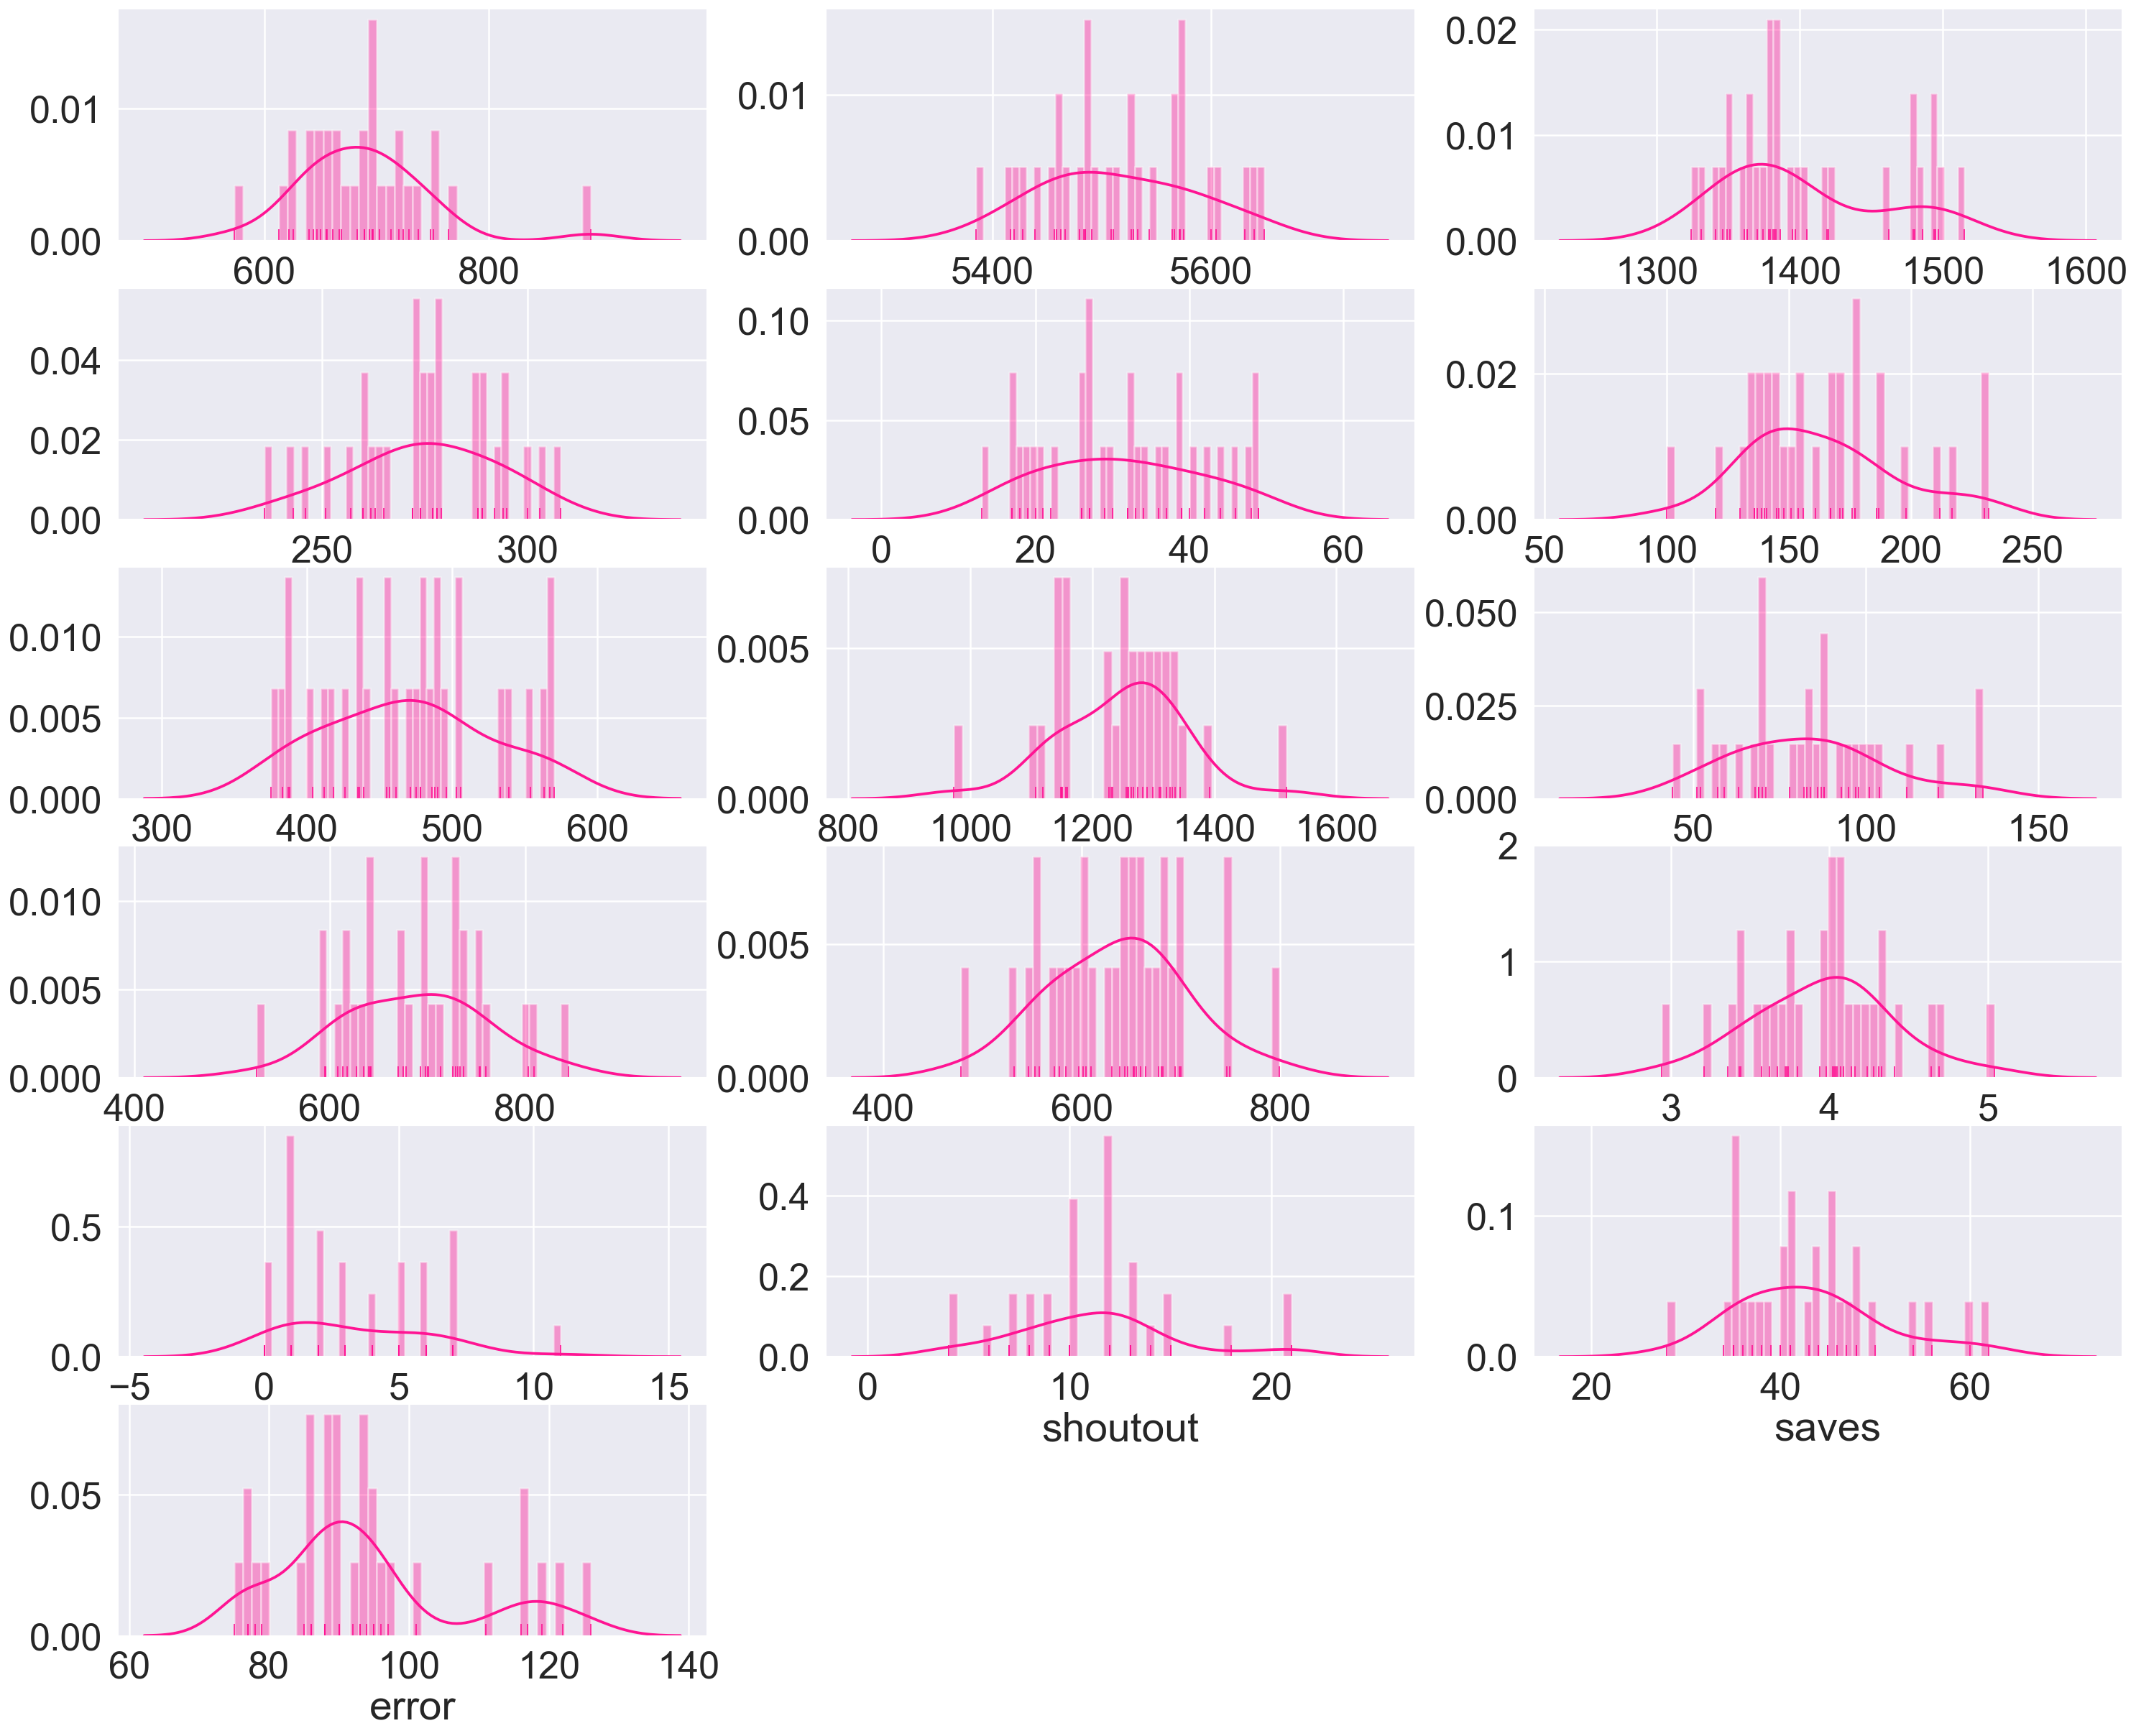

In [43]:
sns.set(style='darkgrid')
plt.figure(dpi=120,figsize=(30,25))
sns.set_context('talk',font_scale=1.9)
for i in range (0,16):
    plt.subplot(6,3,i+1)
    sns.distplot(bb[cl[i]],bins=40,hist=True,kde=True,rug=True,color='deeppink') 


In [44]:
#checking and removing skew
baseball.skew()

runs           -0.215364
AtBat           0.169573
hits            0.783772
dble           -0.335304
tple            0.090124
HomRns          0.450862
walk            0.151193
strikeout      -0.233815
stolen          0.494966
RnsAllowed      0.018155
EarnedRns       0.018461
EarnedRunAvg    0.016693
CmplGame        0.854980
shoutout        0.526943
saves           0.627480
error           0.840271
wins            0.119013
dtype: float64

In [45]:
#skew of 0.55 is allowable so any attribute having skew value more than 0.55 will be treated as skewed data and must be removed.
for i in baseball.columns:
    if baseball.skew().loc[i]>0.55:
        baseball[i]=np.log1p(baseball[i])

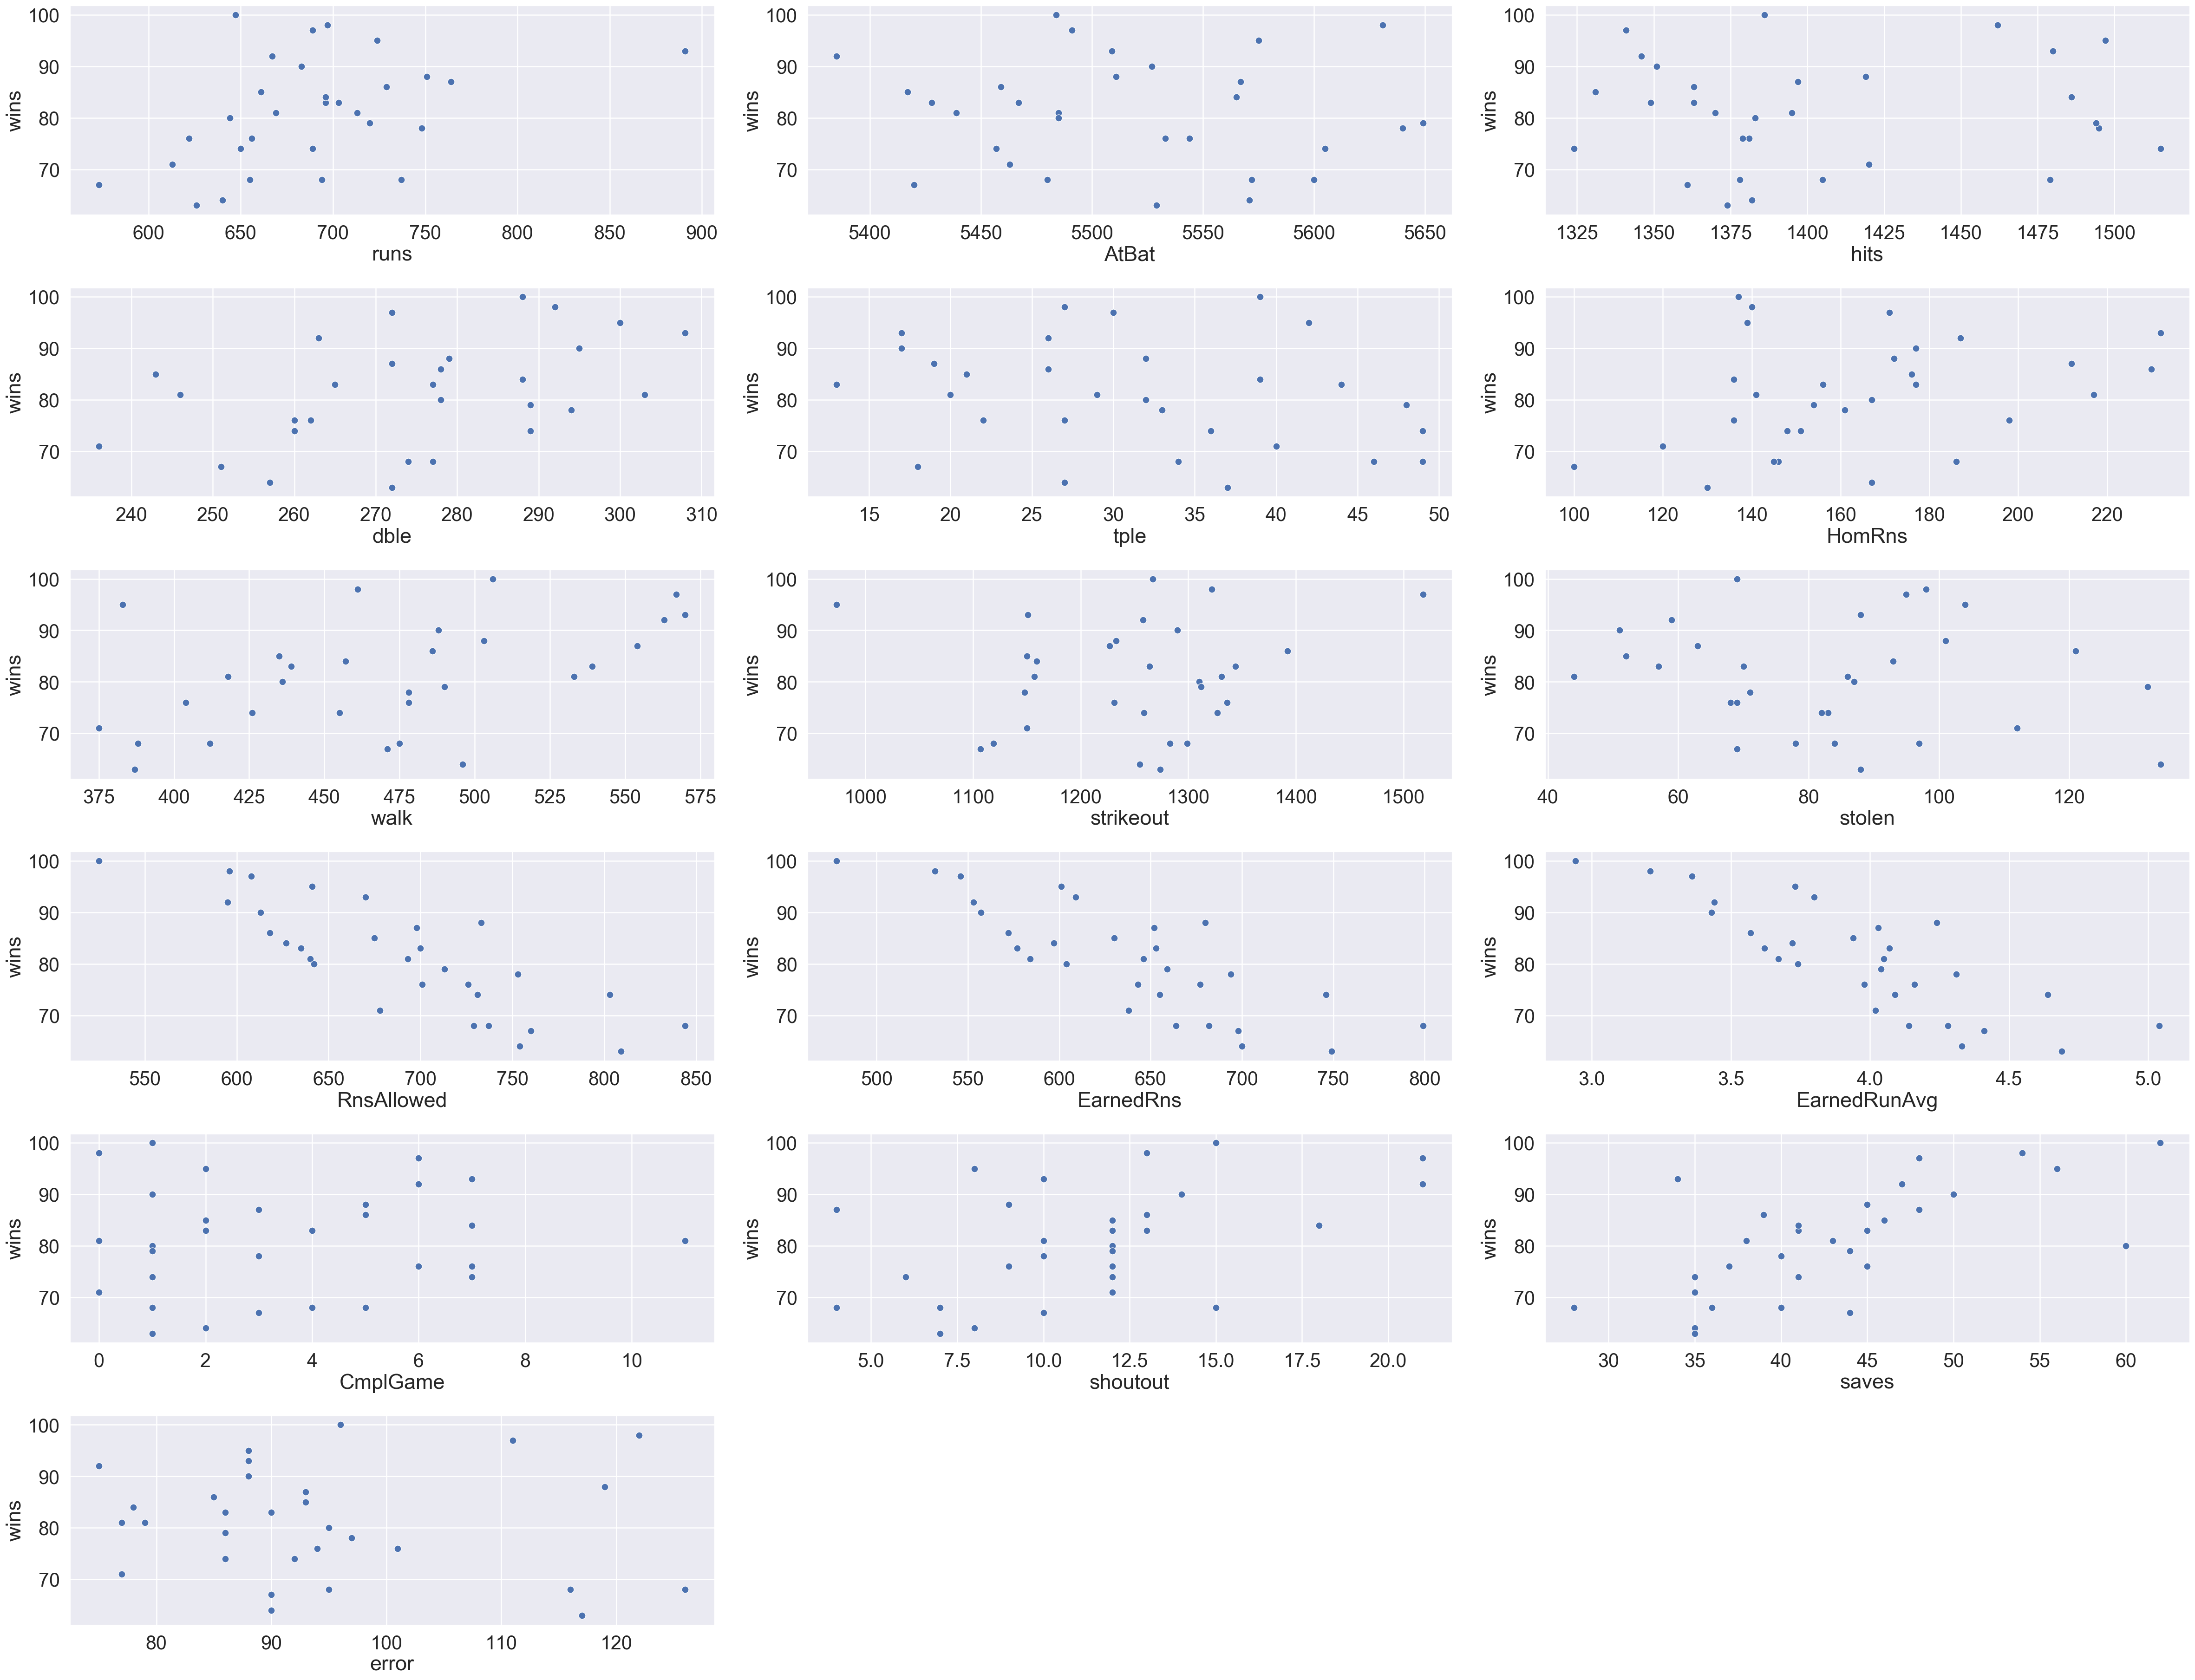

In [46]:
sns.set(style='darkgrid')
plt.figure(dpi=120,figsize=(40,40))
sns.set_context('talk',font_scale=1.5)
for i in range (0,16):
    plt.subplot(8,3,i+1)
    sns.scatterplot(x=(bb[cl[i]]).head(200), y=(bb['wins']).head(200),ci=80,palette='gnuplot') 
plt.tight_layout()
#taking the first 200 rows of all attributes and target var

In [47]:
#checking corelation
base=baseball.corr()
base

,runs,AtBat,hits,dble,tple,HomRns,walk,strikeout,stolen,RnsAllowed,EarnedRns,EarnedRunAvg,CmplGame,shoutout,saves,error,wins
runs,1.000000,0.438022,0.432236,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.164021,-0.085108,0.080162,0.041193,0.390451
AtBat,0.438022,1.000000,0.770154,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.056349,-0.198872,-0.142034,0.321833,-0.085780
hits,0.432236,0.770154,1.000000,0.527354,0.579735,-0.219201,-0.221773,-0.373301,0.420199,0.243639,0.279956,0.255886,0.062589,-0.138087,-0.099684,-0.012775,-0.020785
dble,0.469293,0.490752,0.527354,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.226900,0.084060,0.246600,0.146978,0.384886
tple,0.134204,0.445604,0.579735,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.002910,-0.058896,-0.259901,0.098532,-0.206737
HomRns,0.586894,-0.064653,-0.219201,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.126024,0.005546,0.100228,-0.182374,0.245697
walk,0.258450,-0.137850,-0.221773,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.448140,0.473922,0.205211,-0.052376,0.447513
strikeout,0.081158,-0.111243,-0.373301,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.068395,0.231230,0.119732,0.152594,0.156469
stolen,0.075323,0.373674,0.420199,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.042099,-0.104602,-0.193739,0.078008,-0.169503
RnsAllowed,-0.013858,0.315499,0.243639,-0.215196,0.312750,-0.092586,-0.425381,-0.140570,0.134315,1.000000,0.991286,0.986781,0.079492,-0.641579,-0.629913,0.208579,-0.823176


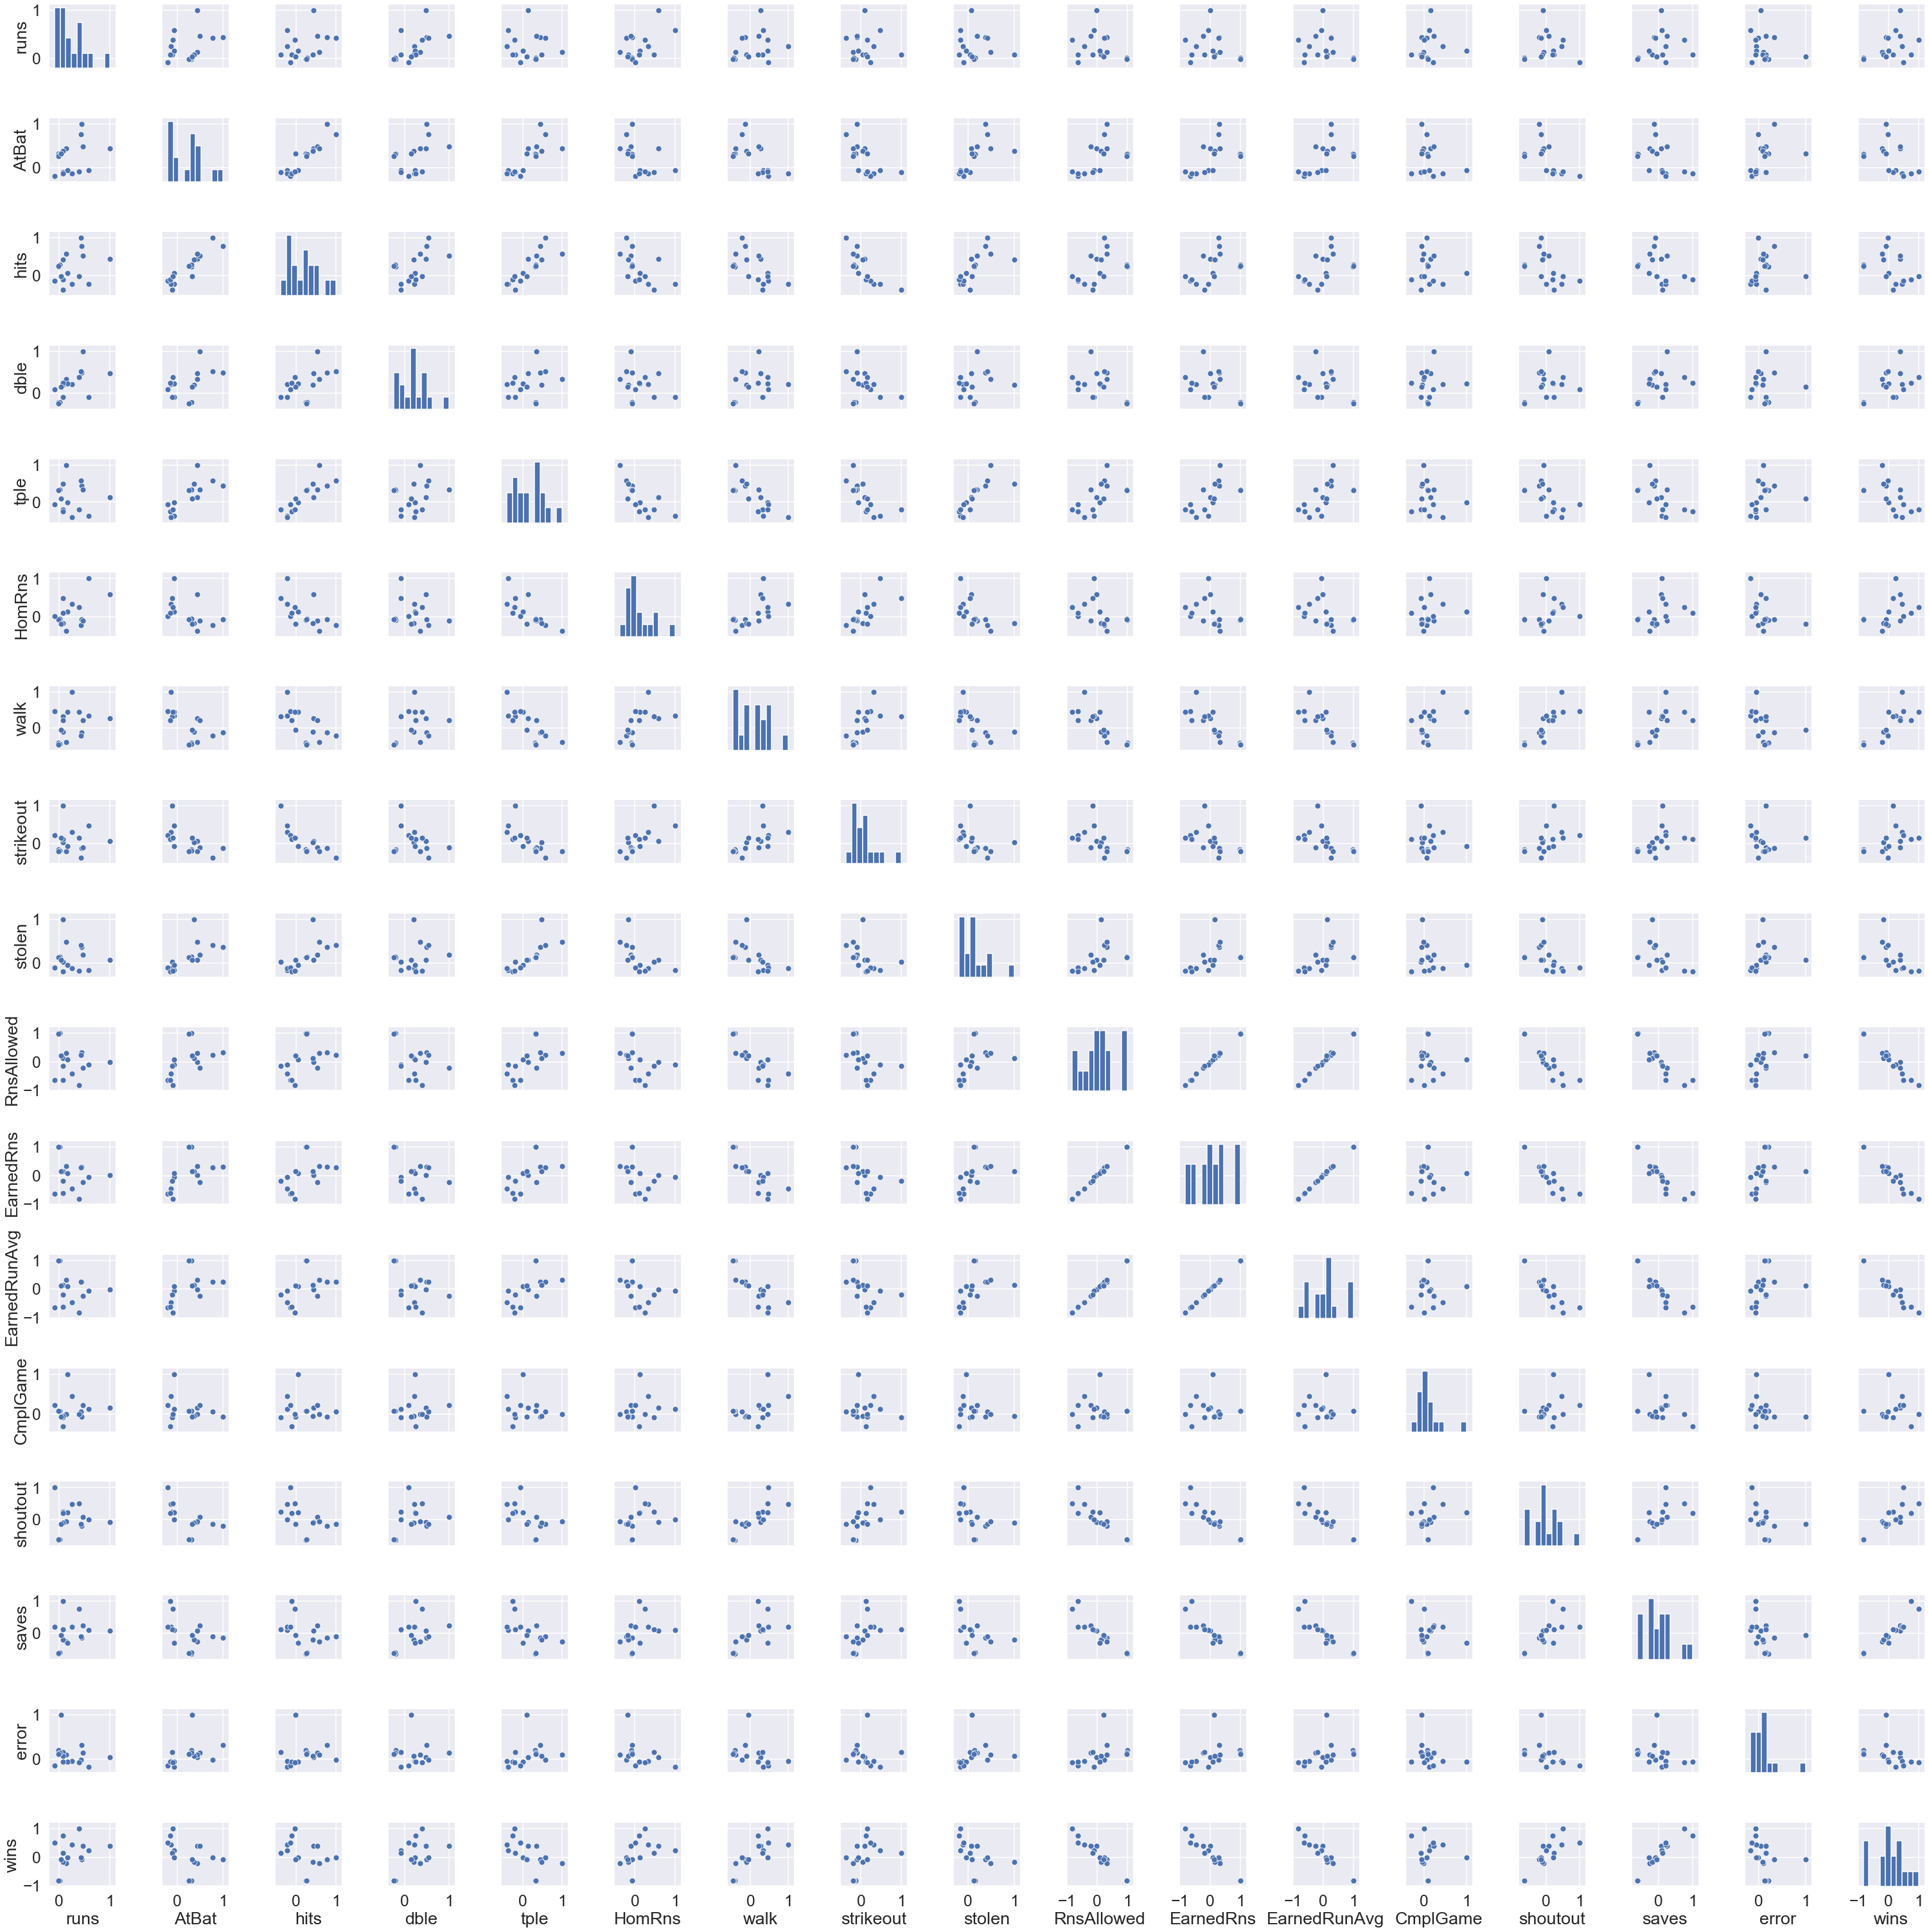

In [48]:
sns.pairplot(base)

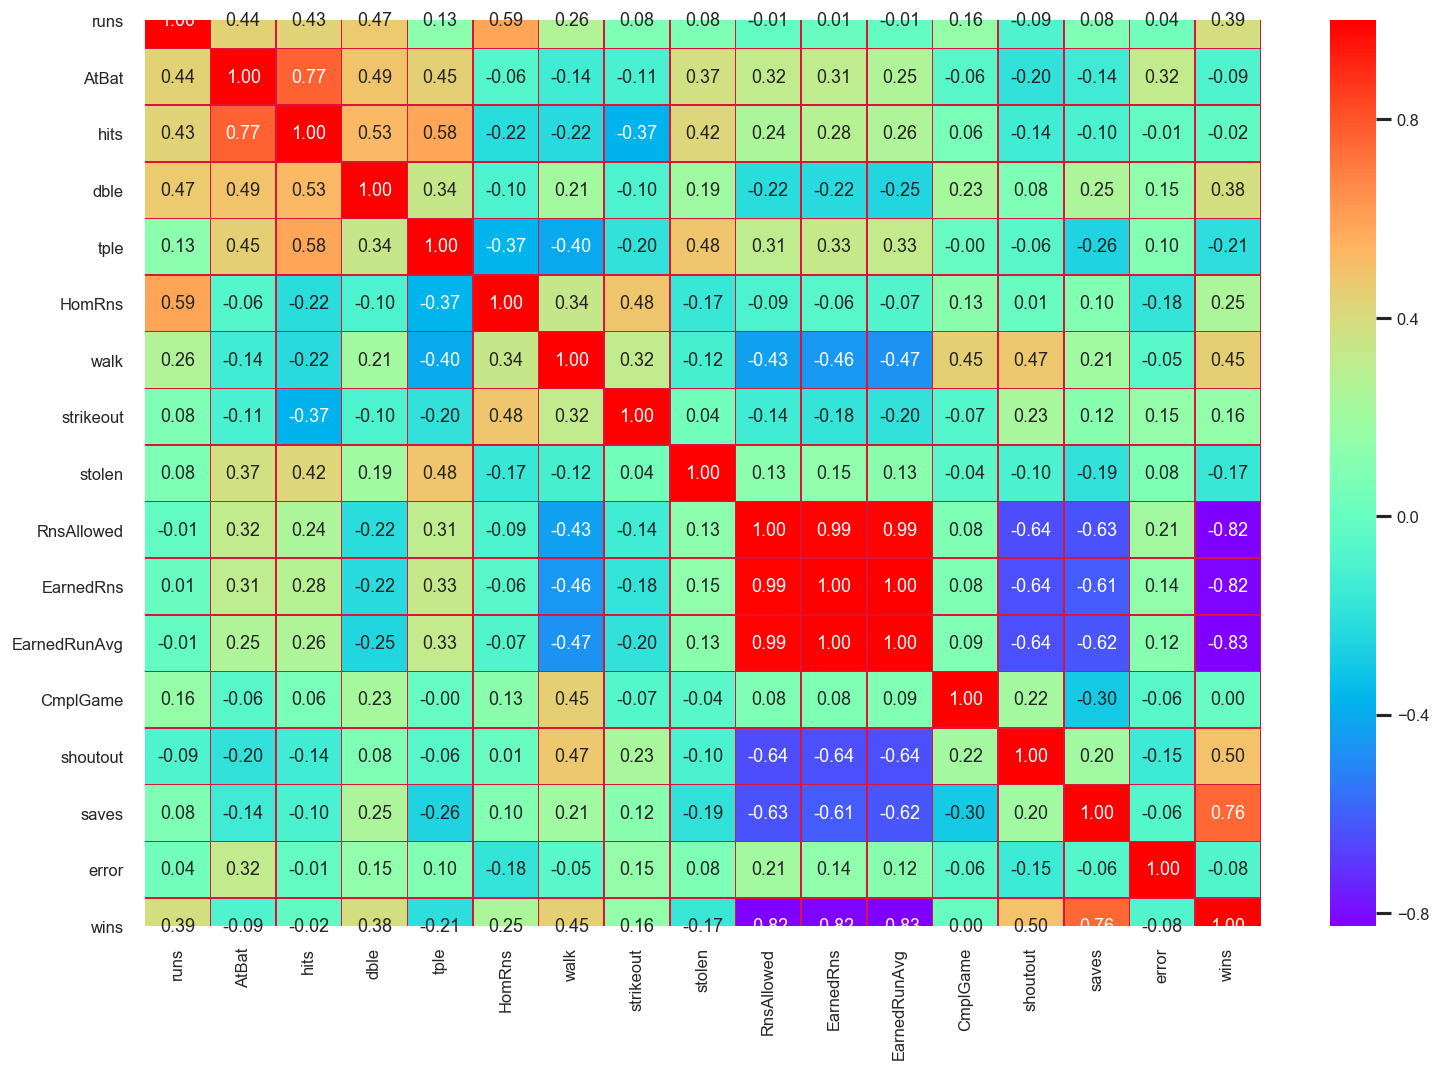

In [49]:
plt.figure(dpi=120,figsize=(15,10))
sns.set_context('talk',font_scale=0.6)
sns.heatmap(base,annot=True,fmt='.2f',cmap='rainbow',linecolor='crimson',linewidth=0.3)

In [50]:
#final dataset to work upon
baseball 

,runs,AtBat,hits,dble,tple,HomRns,walk,strikeout,stolen,RnsAllowed,EarnedRns,EarnedRunAvg,CmplGame,shoutout,saves,error,wins
0,724,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,8,4.043051,4.488636,95
1,696,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,12,3.828641,4.465908,83
2,669,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907,10,3.663562,4.382027,81
3,622,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442,9,3.637586,4.624973,76
4,689,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442,12,3.583519,4.465908,74
6,764,5567,7.242798,272,19,212,554,1227,63,698,652,4.03,1.386294,4,3.891820,4.543295,87
7,713,5485,7.223296,246,20,217,418,1331,44,693,646,4.05,0.000000,10,3.784190,4.356709,81
8,644,5485,7.232733,278,32,167,436,1310,87,642,604,3.74,0.693147,12,4.110874,4.564348,80
9,748,5640,7.310550,294,33,161,478,1148,71,753,694,4.31,1.386294,10,3.713572,4.584967,78
10,751,5511,7.258412,279,32,172,503,1233,101,733,680,4.24,1.791759,9,3.828641,4.787492,88


In [51]:
#importing important librarier for modelling
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts, RandomizedSearchCV as rsv, cross_val_score as cvs
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

In [52]:
baseball.columns

Index(['runs', 'AtBat', 'hits', 'dble', 'tple', 'HomRns', 'walk', 'strikeout',
       'stolen', 'RnsAllowed', 'EarnedRns', 'EarnedRunAvg', 'CmplGame',
       'shoutout', 'saves', 'error', 'wins'],
      dtype='object')

In [53]:
#splitting the dataset
x=baseball.iloc[:,0:13]
y=baseball.iloc[:,-1]

In [54]:
x

,runs,AtBat,hits,dble,tple,HomRns,walk,strikeout,stolen,RnsAllowed,EarnedRns,EarnedRunAvg,CmplGame
0,724,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612
1,696,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612
2,669,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907
3,622,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442
4,689,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442
6,764,5567,7.242798,272,19,212,554,1227,63,698,652,4.03,1.386294
7,713,5485,7.223296,246,20,217,418,1331,44,693,646,4.05,0.000000
8,644,5485,7.232733,278,32,167,436,1310,87,642,604,3.74,0.693147
9,748,5640,7.310550,294,33,161,478,1148,71,753,694,4.31,1.386294
10,751,5511,7.258412,279,32,172,503,1233,101,733,680,4.24,1.791759


In [55]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: wins, dtype: int64

In [56]:
#using standardscaler to scale the data within a range of 0 +/- 1
ss=StandardScaler()
x=ss.fit_transform(x)

In [57]:
y=np.array(y)
y=y.reshape(-1,1)
print('shape of x =',x.shape,'\nshape of y =',y.shape)

shape of x = (29, 13) 
shape of y = (29, 1)


In [58]:
#using PCA to reduce the dimension of x
pca=PCA(8,random_state=43)
pca.fit(x)
xd=pca.transform(x)
print('pca components:-\n',pca.components_)
print("sum of pca.explained_variance_ratio_:",sum(pca.explained_variance_ratio_))
print('shape of x before decomposition =',x.shape,'\n shape of x after decomposition = ',xd.shape)

pca components:-
 [[ 0.05737097  0.30675149  0.3358206   0.06509     0.33732521 -0.15939248
  -0.28708072 -0.18784708  0.20714797  0.39891251  0.40745084  0.40077793
  -0.00481424]
 [-0.40795236 -0.33842283 -0.35972264 -0.50571232 -0.17864297 -0.08346253
  -0.23559595 -0.00994617 -0.19677044  0.24441394  0.23938986  0.25820622
  -0.13031159]
 [-0.39001338 -0.04176062  0.08484245  0.07931666  0.19421166 -0.57235876
  -0.26281876 -0.31086755  0.12182868 -0.2630177  -0.26420672 -0.2572414
  -0.2857137 ]
 [-0.10797763 -0.16574372  0.02953371  0.15787038 -0.07843523 -0.25664845
   0.26930956 -0.48544603 -0.29108821  0.05373306  0.05308948  0.07238897
   0.67763582]
 [-0.31722432 -0.1343661  -0.14919716 -0.0272556   0.2423831  -0.16711756
   0.27073124  0.43590673  0.61534614  0.04953576  0.02237224  0.01963119
   0.35543399]
 [ 0.2953335  -0.42928369  0.02874536 -0.31940949  0.18892186  0.34265135
  -0.21786752 -0.44061294  0.41550006 -0.17984905 -0.07517085 -0.02887982
   0.1395235 ]
 [-0.

In [59]:
#creating a function to get the best random state for a model to get optimum performing model
def model(mod,xd,y):
    r2=0
    for i in range(27,240):
        x_train,x_test,y_train,y_test=tts(xd,y,test_size=0.30,random_state=i)
        mod.fit(x_train,y_train)
        pred=mod.predict(x_test)
        r2score=r2_score(y_test,pred)
        MAE= mean_absolute_error(y_test,pred)
        MSE= mean_squared_error(y_test,pred)
        RMSE=np.sqrt(MSE)
        if r2score > r2:
            r2=r2score
            random_state=i
    print('In this', mod,'model',
          '\n Random State= ',random_state, 
           '\n r2 score is= ',r2score,
          '\n mean abs error value is= ', MAE,
          '\n mean squared error value is= ',MSE,
          '\n & root mean sq error is= ', RMSE )  

LINEAR REGRESSION

In [60]:
lireg=LinearRegression()
m1=model(lireg,xd,y)

In this LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) model 
 Random State=  198 
 r2 score is=  0.6349628550518138 
 mean abs error value is=  4.320231699048822 
 mean squared error value is=  24.561141234168087 
 & root mean sq error is=  4.955919817164931


In [82]:
#CHECKING FOR OVER/UNDER FITTING
lireg_scr=cvs(lireg,xd,y,cv=8,scoring='r2')
print('the R2 score at liner regression model is=',lireg_scr.mean())

the R2 score at liner regression model is= 0.23201492301840485


LASSO REGRESSION

In [62]:
import warnings
warnings.filterwarnings('ignore')

#checking for best parameters for Lasso using RandomizedSearchCV
lso=Lasso()
lso_para={'alpha':(0.01,0.1,1.0,10,)}
lso_rsv=rsv(lso,lso_para,cv=21)
lso_rsv.fit(xd,y)
lso_rsv.best_params_

{'alpha': 0.01}

In [63]:
lso=Lasso(alpha=0.01)
m2=model(lso,xd,y)

In this Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) model 
 Random State=  198 
 r2 score is=  0.6345337599651402 
 mean abs error value is=  4.321486907591852 
 mean squared error value is=  24.590012446789952 
 & root mean sq error is=  4.958831762299458


In [84]:
#CHECKING FOR OVER/UNDER FITTING
lso_scr=cvs(lso,xd,y,cv=8,scoring='r2')
print('the R2 score at LASSO model is=',lso_scr.mean())

the R2 score at LASSO model is= 0.23496107686519252


RIDGE REGRESSION

In [65]:
#checking for best parameters for Ridge using RandomizedSearchCV
rid=Ridge()
rid_para={'alpha':(0.001,0.01,0.1,1.0,10,)}
rid_rsv=rsv(rid,rid_para,cv=20)
rid_rsv.fit(xd,y)
rid_rsv.best_params_

{'alpha': 0.001}

In [66]:
rid=Ridge(alpha=0.001)
m3=model(rid,xd,y)

In this Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) model 
 Random State=  198 
 r2 score is=  0.6349641009611087 
 mean abs error value is=  4.320229642352945 
 mean squared error value is=  24.561057404468624 
 & root mean sq error is=  4.955911359625858


In [85]:
#CHECKING FOR OVER/UNDER FITTING
rid_scr=cvs(rid,xd,y,cv=7,scoring='r2')
print('the R2 score at  RIDGE model is=',rid_scr.mean())

the R2 score at  RIDGE model is= 0.2112204845284588


DECISION TREE REGRESSOR

In [68]:
#check for best parameters using RandomizedSearchCV
dtr=DecisionTreeRegressor()
dp={'criterion':('mse','mae','friedman_mse'),'splitter':('best','random'),'max_depth':randint(1,6)}
dtr_rsv=rsv(dtr,dp,cv=20)
dtr_rsv.fit(xd,y)
dtr_rsv.best_params_

{'criterion': 'mae', 'max_depth': 5, 'splitter': 'best'}

In [69]:
#generating model by using the parameters obtained
dtr=DecisionTreeRegressor(criterion='mae',splitter='best',max_depth=1)
m4=model(dtr,xd,y)

In this DecisionTreeRegressor(criterion='mae', max_depth=1, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') model 
 Random State=  179 
 r2 score is=  -0.9259174311926601 
 mean abs error value is=  9.166666666666666 
 mean squared error value is=  129.58333333333334 
 & root mean sq error is=  11.38346754435279


In [70]:
#CHECKING FOR OVER/UNDER FITTING
dtr_scr=cvs(dtr,xd,y,cv=7,scoring='r2')
print('the R2 score at DTR model is=',dtr_scr.mean())

the R2 score at DTR model is= -1.2531280295120903


SUPPORT VECTOR REGRESSOR

In [71]:
#checking for best parameters for SVR using GridSearchCV
svr=SVR()
svr_para={'kernel':('poly','rbf','linear'),'gamma':(0.001,0.01,1,10),'degree':randint(3,15)}
svr_rsv=rsv(svr,svr_para,cv=20)
svr_rsv.fit(xd,y)
svr_rsv.best_params_

{'degree': 6, 'gamma': 10, 'kernel': 'linear'}

In [72]:
svr=SVR(degree=9,gamma=1,kernel='poly')
m5=model(svr,xd,y)

In this SVR(C=1.0, cache_size=200, coef0=0.0, degree=9, epsilon=0.1, gamma=1,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False) model 
 Random State=  76 
 r2 score is=  -2.138328897612981 
 mean abs error value is=  12.297378818445912 
 mean squared error value is=  211.15916656778703 
 & root mean sq error is=  14.53131675271677


In [86]:
#CHECKING FOR OVER/UNDER FITTING
svr_scr=cvs(svr,xd,y,cv=7,scoring='r2')
print('the R2 score at SVR model is=',svr_scr.mean())

the R2 score at SVR model is= -2519.661190941523


KNEIGHBORS REGRESSOR

In [74]:
knr=KNeighborsRegressor()
kp={'n_neighbors':randint(2,8),'algorithm':('auto','ball_tree','kd_tree','brute')}
k_rsv=rsv(knr,kp,cv=20)
k_rsv.fit(xd,y)
k_rsv.best_params_

{'algorithm': 'kd_tree', 'n_neighbors': 5}

In [75]:
knr=KNeighborsRegressor(algorithm='auto',n_neighbors=3)
m6=model(knr,xd,y)

In this KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform') model 
 Random State=  71 
 r2 score is=  0.5442201834862387 
 mean abs error value is=  4.518518518518517 
 mean squared error value is=  30.66666666666666 
 & root mean sq error is=  5.537749241945383


In [76]:
knr_scr=cvs(knr,xd,y,cv=7,scoring='r2')
print('the R2 score at KNR model is=',knr_scr.mean())

the R2 score at KNR model is= -0.17195752911051704


RANDOM_FOREST_REGRESSOR

In [77]:
rfr=RandomForestRegressor()
rfr_para={"n_estimators":[30,50,70],'max_features':randint(2,7),'min_samples_leaf':randint(3,7),
          'max_depth':[3,7]}
rfr_rsv=rsv(rfr,rfr_para,cv=20)
rfr_rsv.fit(xd,y)
rfr_rsv.best_params_

{'max_depth': 7, 'max_features': 5, 'min_samples_leaf': 4, 'n_estimators': 50}

In [78]:
rfr=RandomForestRegressor(max_depth=3,max_features=5,min_samples_leaf=3,n_estimators=50)
m7=model(rfr,xd,y)


In this RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) model 
 Random State=  71 
 r2 score is=  0.2889788068661505 
 mean abs error value is=  4.810580487413819 
 mean squared error value is=  47.84031484666025 
 & root mean sq error is=  6.916669346344398


In [79]:
rfr_scr=cvs(rfr,xd,y,cv=7,scoring='r2')
print('the R2 score at RFR model is=',rfr_scr.mean())

the R2 score at RFR model is= -0.05991813216676908


Putting all those scores obtained in a single dataframe for batter visualization and judgement

In [88]:
info=[[' LINEAR_REG ', 198 , 0.6349 , 0.2320 ],
      [' LASSO ', 198 , 0.6345 , 0.2349 ],
      [' RIDGE ',198 , 0.6349 ,0.2112],
      [' DECISION TREE REGRESSOR ', 179 , -0.9259 , -1.2531 ],
      [' SVR ', 76 , -2.1383 , -2519.6 ],
      [' KNEIGHBORS_REGRESSOR ', 71 , 0.54422 , -0.17195 ],
      [' RANDOM FOREST REGRESSOR ', 71 , 0.28897 , -0.05991 ]]


tab=pd.DataFrame(info,columns=['MODEL_NAME','RANDOM_STATE','R2_SCORE W/O CV', 'R2_SCORE WITH CV'])
tab
#R2_SCORE W/O CV, R2_SCORE WITH CV represents the r2 score obtained from modelling and cross_validation respectively

,MODEL_NAME,RANDOM_STATE,R2_SCORE W/O CV,R2_SCORE WITH CV
0,LINEAR_REG,198,0.63490,0.23200
1,LASSO,198,0.63450,0.23490
2,RIDGE,198,0.63490,0.21120
3,DECISION TREE REGRESSOR,179,-0.92590,-1.25310
4,SVR,76,-2.13830,-2519.60000
5,KNEIGHBORS_REGRESSOR,71,0.54422,-0.17195
6,RANDOM FOREST REGRESSOR,71,0.28897,-0.05991


so from the above scores its clear that the models are too weak and are not fitting properly

In [ ]:
#using adaboostregressor for boosting

In [89]:
from sklearn.ensemble import AdaBoostRegressor

In [95]:
x_train,x_test,y_train,y_test = tts(xd,y,test_size=0.33,random_state=198)
lireg=LinearRegression()
para={'n_estimators':randint(10,60),'learning_rate':(0.1,0.01,0.001,0.0001)}
abr=AdaBoostRegressor(base_estimator=lireg)
abr_rsv=rsv(abr,para,cv=6)
abr_rsv.fit(x_train,y_train)
print("best parameters:", abr_rsv.best_params_)
print("\n best score:",abr_rsv.best_score_)


best parameters: {'learning_rate': 0.01, 'n_estimators': 34}

 best score: -1.4256766868809196


saving the model LASSO as final model

In [96]:
import joblib
joblib.dump(lso,'baseball_lso.pkl')



['baseball_lso.pkl']